# Few shot learning Experiments

In [1]:
import os
import argparse
import pandas as pd
import time
import glob
import json
from collections import Counter
import numpy as np
#import cv2
from PIL import Image



json_path = '/home/pavanteja/workspace/IntuitionMachines/transfer_learning/few-shot/data/fashion-dataset-small/data_fewshot.json'

with open(json_path, 'r') as f:
    data_div = json.load(f)
# data_div = 
def check_data(data_div, low_rand = 1, task = 'Task1'):
    DATA_PATH = '/home/pavanteja/workspace/IntuitionMachines/transfer_learning/TransferLearningFashion/data/fashion-dataset-small/images'
    if low_rand:
        low_var_class = ['Shirts', 'Sweaters', 'Sweatshirts',  'Kurta Sets', 'Jumpsuit']
    else:
        low_var_class = ['Bracelet', 'Tracksuits', 'Mask and Peel', 'Scarves', 'Sports Shoes']

    find_inds = [data_div['evaluation']['class_list'].index(class_) for class_ in low_var_class]

    import matplotlib.pyplot as plt
    import numpy as np
#     import pdb; pdb.set_trace()
    # plot the images in the batch, along with the corresponding labels
    fig = plt.figure(figsize=(25, 5))
    for i, ind in enumerate(find_inds):
        img_name = os.path.join(DATA_PATH, data_div['evaluation']['image_list'][ind])
        cls_name = data_div['evaluation']['class_list'][ind]
        img_ = Image.open(img_name)
        ax = fig.add_subplot(1,len(find_inds), i+1, xticks=[], yticks=[])
        plt.imshow(img_)
        ax.set_title(cls_name)
    fig.suptitle(task)
    plt.show()

ModuleNotFoundError: No module named 'pandas'

# 1. Training and Test Details for 5-shot 5-way

Settings For all three methods
1. Minimum number of examples in Fashion = 11
2. Number of N_train , N_test = 5
3. Number of Q_train(Query samples on which the algorithm is trianed) = (11 - N_train/N_test)


Preprocessing Details (Applied in the below order all three Networks):
1.  Original image : 300 x 400 pixels
2. Random Crop  : 224 pixels
3. RandomResize: 84 pixels Random size sampled from (0.08, 1.0), resized with and AR (3/4, 4/3))
4. Channel wise scaling : [0, 255] -> [0,1]
5. Mean, Variance Normalization
  
  
Hyper parameters and details:

| Method| Num Epochs(Drop @) | LR Rate  | Train/Test curve |
| --- | --- | --- | --- | 
| Proto Nets | 80(42)  | 1e-3|   ![Train/Test Curves](images/proto_5_way_5_shot.png)|
| Matching Nets | 200(48)| 1e-3|![Train/Test Curves](images/matching_5_shot_5_way.png) |
| MAML | 40 | 1e-3 | ![Train/Test Curves](images/maml_5_way_5shot.png)|



<h1>2. Results</h1>
- Evaluation episodes  = 1000
- Sample division = (n_test(N-shot(1, 5) SUPPORT) + q_test(TEST) ) *  K_WAY(2, 5, 15)
- Accuracies are averaged over last 4 epochs and variance in the plots is drawn from the same.



<h3><center> 1 -shot </center> </h3>

| Method| 2-way | 5-way | 15-way |
| --- | --- | --- | --- | 
| Proto Nets | 85.6  | 69.5| 50.5|
| Matching Nets | 83.3 | 66.6| 51.8 |
| MAML | 87.5| 71.6 | 47.3|

![Train/Test Curves](images/1-shot_nway.png)

<h3><center> 5 -shot </center> </h3>


| Method| 2-way | 5-way | 15-way |
| --- | --- | --- | --- | 
| Proto Nets |93.6|84.5| 70.5| 
| Matching Nets |  81.0| 80.6 | 70.78|
| MAML |  94.8 | 83.1 | 71.8 | 

![Train/Test Curves](images/5_shot_n_way.png)


<h3> <center> 1 shot vs 5 shot </center> </h3>

![Train/Test Curves](images/1 shot vs 5 shot.png)


# 3. Ablations on 5_Shot_5_way

Analysis for 5-shot 5-way classification:
(Evaluation episodes = 1000 )

1. Individual accuracies of tasks range from  **56 % - 96 %**. This has been observed for all the three methods.
2. This shows that some tasks are very easy while others are very difficult to learn.


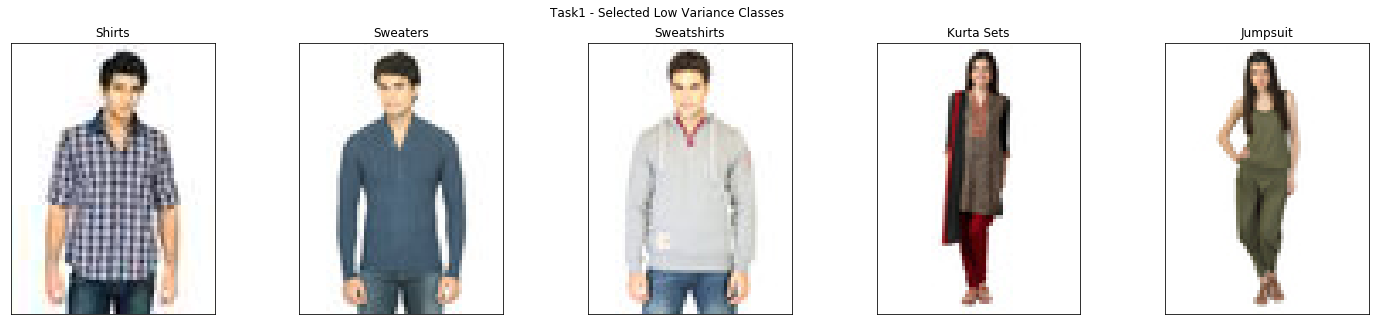

In [8]:
check_data(data_div, 1, 'Task1 - Selected Low Variance Classes')
# LOW VARIANCE CLASSES

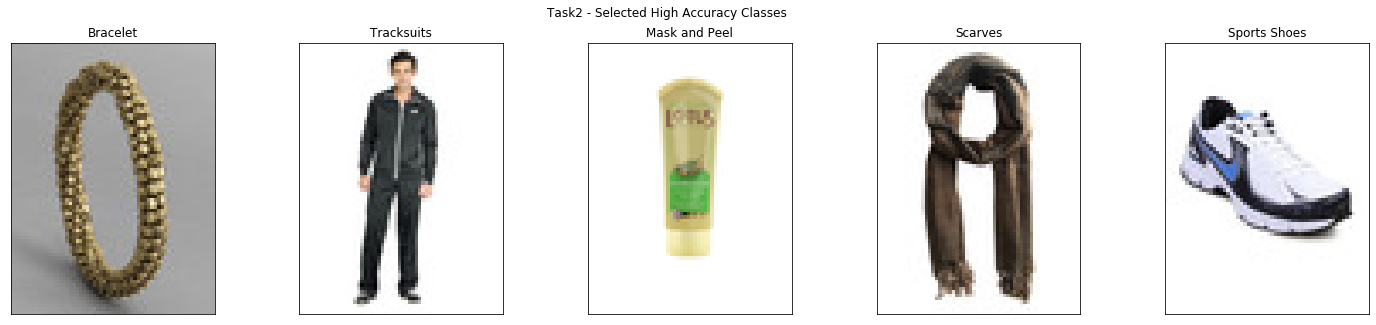

In [13]:
check_data(data_div, 0, 'Task2 - Selected High Accuracy Classes')
# LOW VARIANCE CLASSES

## 3.2 Detailed results on two  such tasks

**Task** - 1 Selected Low Variance Classes 

**Task** - 2 Selected High Accuracy Classes

| Method| Task-1 | Task - 2 
| --- | --- | --- | 
| Proto Nets | **63.84** | **93.48**|
| Matching Nets | 56.67 | 87.80|
| MAML |28.03 | 20.2 |

1. High accuracy classes donot span across different architectures. Where as models perform consistently poor on low variance classes
2. Classes with low variance perform poorly with the current few-shot learning methods
2. When there is a high variance models seem to perform well.
3. ProtoNets perform well when compared to MAtching Nets.

# 3.3 Domain Transfer from Imagenet -- > Fashion

### Train on Imagenet and Test on  Fashion
| Method| ImageNet(Full) | Fashion(Full) | Task 1 | Task 2 
| --- | --- | --- | ---| --- |
| Proto Nets | 62.2  | **81.44** | 62.16 | 92.6  |
| Matching Nets | 53.2|  63.52| 51.28 | 65.7   |
| MAML | 49.44 |  33.98 |  31.28 | 28.66   |

1. Prototypical Networks adapt well when compared to Matching and MAML. 
2. Even though Matching Networks claims to learn the embedding but prototypical performs the best.
3. MAML highly overfits on the train data.



# 4.  Conclusions

1. Accuracy on a n_shot k_way classification task is highly dependent on the task difficulty.
2. Classification with less inter-class variability seems to perform poor (56 %) when compared to the best (96 %).
3. MAML seems to peform better than other approaches but at the cost of training time.
4. Domain transfer from Imagenet to Fashion gives considerable accuracies. *ProtoNet* seems to perform much better over *Matching Net* 

# 4.1 Future Work

1. Pretraining with Imagenet and fine-tune with Fashion. The above domain transfer experiment inspires this idea.
2. Embedding function Analysis. Even though MAML achieve state-of the art results for Fashion, ProtoNets are very interesting despite their constant embedding function and low training time.
3. Imposing embedding consistency  by using triplet loss could lead to better results.
4. Currently shallow networks are used for embedding function but using Resnet 18 would definetely improve the representation at the cost of ignoring intra class variations.
